In [1]:
from grokking import utils

In [2]:
log_filepath = r"D:\Dropbox\out_dir\grokking\seed_search_loader_gen.txt"

In [3]:
with open(log_filepath, 'r') as f:
    lines = f.readlines()

logs = []
for line in lines:
    columns = line.split('[INFO] ')[1].split(',')
    log = {}
    for column in columns:
        if '=' in column:
            key, val = tuple(column.split('='))
            val = val.strip()
            if val.isnumeric():
                val = int(val)
            else:
                try:
                    val = float(val)
                except ValueError:
                    pass
            log[key.strip()] = val
    logs.append(log)
    
print('Number of logs: {}'.format(len(logs)))
print('Example log: {}'.format(logs[0]))

Number of logs: 709
Example log: {'data_loader_seed': 0, 'train/step': 3000, 'val/acc': 0.01196, 'epoch': 62, 'epoch_step': 11}


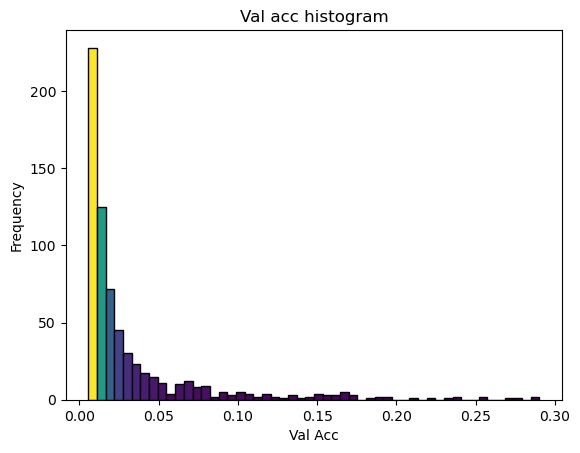

In [8]:
utils.draw_histogram([log['val/acc'] for log in logs if log['val/acc'] < 0.3], 'Val Acc', 'Frequency', 'Val acc histogram')

In [6]:
good_seeds = [log['data_loader_seed'] for log in logs if log['val/acc'] > 0.98]
print([bin(g) for g in good_seeds])
print('Number of good seeds: {}'.format(len(good_seeds)))
print('% of good seeds: {}%'.format(len(good_seeds) * 100.0 / len(logs)))

['0b1000', '0b11011100', '0b1000000010']
Number of good seeds: 3
% of good seeds: 0.4231311706629055%


In [9]:
normal_seeds = [log['data_loader_seed'] for log in logs if log['val/acc'] < 0.25]
print('Number of normal seeds: {}'.format(len(normal_seeds)))
print('% of normal_seeds seeds: {}%'.format(len(normal_seeds) * 100.0 / len(logs)))

Number of normal seeds: 671
% of normal_seeds seeds: 94.64033850493654%
